In [230]:
import numpy as np
import time
from matplotlib import pyplot as plt
from tqdm import tqdm
from scipy.optimize import curve_fit




%matplotlib inline


<h1> Part 1. Primm Algorithm for finding Minimum Spanning tree</h1>

In [172]:
#define graph generators

def random_adjacency_matrix(n,e):   
    A = np.zeros((n,n))
    counter = 1
    for i in range(e):
        ed = edge = 0
        while ed == edge or A[ed,edge] != 0:
            ed = np.random.randint(0, high=n)
            edge = np.random.randint(0, high=n)
        weight = np.random.randint(1,high=10)
        counter +=1
        A[ed,edge] = weight
        A[edge,ed] = weight
    return A

def convert_w(A): 
    adjList = {} 
    for i in range(len(A)): 
        adjList[i] = {}
        for j in range(len(A[i])): 
                       if A[i][j] > 0: 
                           adjList[i][j] = A[i][j]
    return adjList

In [173]:
#define Primm algorithm

from collections import defaultdict
import heapq


def primm(graph, starting_vertex):
    mst = defaultdict(set)
    visited = set([starting_vertex])
    edges = [
        (cost, starting_vertex, to)
        for to, cost in graph[starting_vertex].items()
    ]
    heapq.heapify(edges)

    while edges:
        cost, frm, to = heapq.heappop(edges)
        if to not in visited:
            visited.add(to)
            mst[frm].add(to)
            for to_next, cost in graph[to].items():
                if to_next not in visited:
                    heapq.heappush(edges, (cost, to, to_next))

    return mst

In [174]:
#create example matrix for Primm
m = random_adjacency_matrix(10,45)

In [175]:
m

array([[0., 1., 1., 8., 1., 6., 2., 8., 4., 3.],
       [1., 0., 3., 3., 1., 1., 5., 2., 9., 9.],
       [1., 3., 0., 9., 8., 5., 2., 9., 3., 2.],
       [8., 3., 9., 0., 2., 9., 6., 2., 2., 9.],
       [1., 1., 8., 2., 0., 1., 4., 6., 2., 7.],
       [6., 1., 5., 9., 1., 0., 6., 7., 7., 1.],
       [2., 5., 2., 6., 4., 6., 0., 2., 2., 4.],
       [8., 2., 9., 2., 6., 7., 2., 0., 5., 9.],
       [4., 9., 3., 2., 2., 7., 2., 5., 0., 7.],
       [3., 9., 2., 9., 7., 1., 4., 9., 7., 0.]])

In [176]:
g = convert_w(m)

In [177]:
g

{0: {1: 1.0, 2: 1.0, 3: 8.0, 4: 1.0, 5: 6.0, 6: 2.0, 7: 8.0, 8: 4.0, 9: 3.0},
 1: {0: 1.0, 2: 3.0, 3: 3.0, 4: 1.0, 5: 1.0, 6: 5.0, 7: 2.0, 8: 9.0, 9: 9.0},
 2: {0: 1.0, 1: 3.0, 3: 9.0, 4: 8.0, 5: 5.0, 6: 2.0, 7: 9.0, 8: 3.0, 9: 2.0},
 3: {0: 8.0, 1: 3.0, 2: 9.0, 4: 2.0, 5: 9.0, 6: 6.0, 7: 2.0, 8: 2.0, 9: 9.0},
 4: {0: 1.0, 1: 1.0, 2: 8.0, 3: 2.0, 5: 1.0, 6: 4.0, 7: 6.0, 8: 2.0, 9: 7.0},
 5: {0: 6.0, 1: 1.0, 2: 5.0, 3: 9.0, 4: 1.0, 6: 6.0, 7: 7.0, 8: 7.0, 9: 1.0},
 6: {0: 2.0, 1: 5.0, 2: 2.0, 3: 6.0, 4: 4.0, 5: 6.0, 7: 2.0, 8: 2.0, 9: 4.0},
 7: {0: 8.0, 1: 2.0, 2: 9.0, 3: 2.0, 4: 6.0, 5: 7.0, 6: 2.0, 8: 5.0, 9: 9.0},
 8: {0: 4.0, 1: 9.0, 2: 3.0, 3: 2.0, 4: 2.0, 5: 7.0, 6: 2.0, 7: 5.0, 9: 7.0},
 9: {0: 3.0, 1: 9.0, 2: 2.0, 3: 9.0, 4: 7.0, 5: 1.0, 6: 4.0, 7: 9.0, 8: 7.0}}

In [178]:
tree = primm(g, 0)

In [180]:
#This tree is a dictionary representation of minimum spanning tree

tree

defaultdict(set, {0: {1, 2, 4, 6}, 1: {5, 7}, 5: {9}, 4: {3}, 3: {8}})

<h1>Part 2. TSP problem with minimum spanning tree</h1>

In [181]:
#Create in-order tree traversal for printing the path
def pre_order(tree, start, vertices):
    path = []
    visited = set()
    to_visit = []
    to_visit.append(start)
    while len(visited) < vertices:
        current = to_visit.pop()
        if current not in visited:
            visited.add(current)
            path.append(current)
            if tree.get(current) is not None:
                to_visit.extend(list(tree[current]))
    return path
            
    
    

In [187]:
#Create path from the starting point, then create cycle out of path
path = pre_order(tree,0,10)
print(path)
path.append(path[0])
cycle = path
print(cycle)

[0, 6, 4, 3, 8, 2, 1, 7, 5, 9]
[0, 6, 4, 3, 8, 2, 1, 7, 5, 9, 0]


In [188]:
#Finally, count the weight of the cycle

weight = 0
for i in range(len(cycle)-1):    
    weight += g[cycle[i]][cycle[i+1]]
print(weight)
    

29.0


In [265]:
graphs = []
for n in tqdm(range(2,200)):
    edges = int((n*(n-1))/2)
    m = random_adjacency_matrix(n,edges)
    graphs.append(convert_w(m))

100%|██████████| 198/198 [04:36<00:00,  1.40s/it]


In [266]:
#Experiment with the algorithm perfomance dependin on the size of the graph
#Will generate full graph on vertices in [1,200] and measure algorithm time.


averages = []

for g in tqdm(graphs):
    #edges = int((n*(n-1))/2)
    #m = random_adjacency_matrix(n,edges)
    #g = convert_w(m)
    #g = graphs[n]
    times = []
    for i in range(5):
        start = time.perf_counter()
        tree = primm(g, 0)
        path = pre_order(tree,0,(len(g)))
        path.append(path[0])
        cycle = path
        weight = 0
        for i in range(len(cycle)-1):    
            weight += g[cycle[i]][cycle[i+1]]
        finish = time.perf_counter() - start
        times.append(finish)
    averages.append((sum(times)-max(times))/4)
        
        

100%|██████████| 198/198 [00:14<00:00, 13.82it/s]


In [283]:
#define function for theoretical estimation of Algorithm complexity
#Should be O(V*log(V))
def estimator(v,a,b,c,d):
    e = (v*(v-1))/2
    return a + (b*v)*(c*np.log(v)) + d*e*np.log(v)

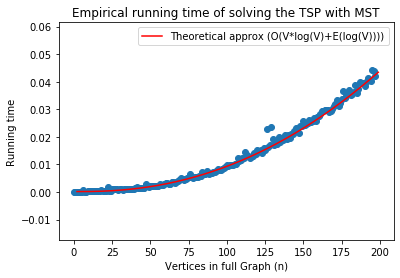

In [287]:
plt.scatter(range(len(averages)),averages)
x = list(range(2,200))
coeffs = curve_fit(estimator,x,averages)[0]
theoretical = np.array([estimator(el, *coeffs) for el in x])
plt.plot(x,theoretical, "-", label = "Theoretical approx (O(V*log(V)+E(log(V))))", color="red")
plt.xlabel("Vertices in full Graph (n)")
plt.ylabel("Running time")
plt.title("Empirical running time of solving the TSP with MST")
plt.legend()
